In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt

import cv2
import os
import glob

In [2]:
file_path = r"C:\Users\Paweł Knap\Desktop\pythonProject\pliki inżynierka\dane_2903\measurement_no_fault_concatenated_2903.wav"

filename = "no_fault"

In [3]:
#read data from file
fs, data = wavfile.read(file_path)

print(f"File sample rate: {fs} [Hz]")

File sample rate: 11025 [Hz]


Run cell below only in case when you need to rescale data.

Sample  Sensitivity
Rate    Adjustment
        Factor

8000    1.03214014
11025   1.02972268
16000   1.02574687
22050   1.02091196
32000   1.01296033
44100   1.00329051
48000   1.00000000

In [4]:
sensitivity =  33000 #specific for used device [digital counts/m/s^2]

adjustment_factor = 1.02972268 #sensivity adjustment factor for 11.025 kHz sample rate

sensitivity = sensitivity * adjustment_factor
print(max(data))
data = data/(sensitivity)
print(max(data))

312403968
9193.530542700011


Run cell below only if you want to standarize data with z-score standarization.

In [5]:
#data standarization, mean equals 0, std equals 1
mean = np.mean(data)
std = np.std(data)

data = (data - mean)/std

print("Mean of the signal: %.2f" % mean)
print("Standard deviation of the signal: %.2f" % std)

Mean of the signal: 0.02
Standard deviation of the signal: 256.48


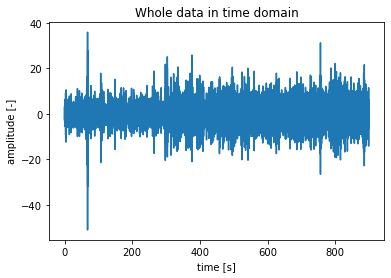

In [6]:
time = np.arange(0,len(data),1)
time = time*(1/fs)


        
plt.plot(time,data)
plt.xlabel('time [s]')
plt.ylabel('amplitude [-]')
plt.title('Whole data in time domain')
plt.show()

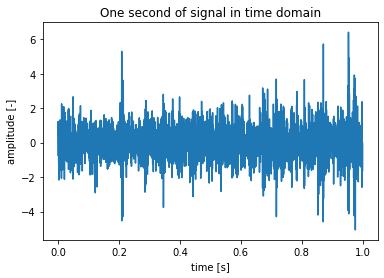

In [7]:
#one second of measured signal in time domain

batch = data[100000:(100000+fs)]
batch_len = len(batch)
t = np.arange(0,batch_len)
t = t / batch_len

plt.plot(t,batch)
plt.xlabel('time [s]')
plt.ylabel('amplitude [-]')
plt.title('One second of signal in time domain')
plt.show()

Text(0.5, 1.0, 'Frequency spectrum of one second of signal')

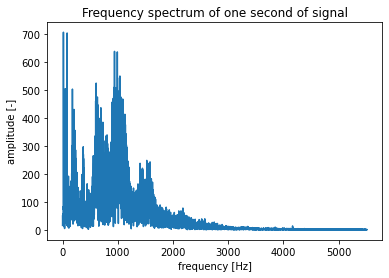

In [10]:
#frequency spectrum of one second of signal
freq_spectrum = np.abs(np.fft.rfft(batch))
f = np.fft.rfftfreq(len(batch), 1/fs)

plt.plot(f,freq_spectrum)
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude [-]')
plt.title('Frequency spectrum of one second of signal')
plt.savefig("fft.png", dpi=300)
#plt.show()


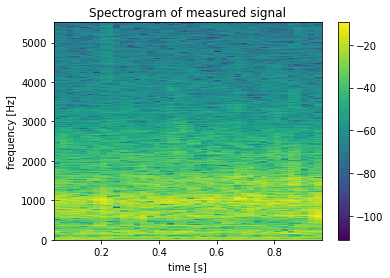

In [9]:
#frequency spectrum of one second of signal
window_width = 1024

f, t, Sxx = sig.spectrogram(batch, fs=fs, window=np.hamming(window_width), nperseg=window_width, noverlap=0.75*window_width, 
                                scaling='spectrum', mode='magnitude')
plt.pcolormesh(t, f, 20 * np.log10(Sxx),shading = 'auto')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.title('Spectrogram of measured signal')
plt.ylim(0, fs/2)
#uncomment if u want to set limits on colorbar
#plt.clim(-60,0)
plt.colorbar()
plt.show()

In [38]:
#spectrogram

window_width = 1024

#parametrs needed to crop axes from image
h = 904 #height of crop
w = 1114 #width of crop
x = 226 #first x of crop
y = 144 #first y of crop

numel = len(data) #length of measurement file

batch = data[0:fs] #first batch for loop

max_loop = (numel)//fs

for i in range(0,max_loop):
    f, t, Sxx = sig.spectrogram(batch, fs=fs, window=np.hamming(window_width), nperseg=window_width, noverlap=0.75*window_width, 
                                scaling='spectrum', mode='magnitude')
    plt.pcolormesh(t, f, 20 * np.log10(Sxx),shading = 'auto')
    plt.xlabel('czas [s]')
    plt.ylabel('częstotliwość [Hz]')
    plt.title('Spektrogram sygnału z akcelerometru')
    plt.ylim(0, fs/2)
    #uncomemment if you want to set color axis limits manually
    #plt.clim(-60,0)
    plt.colorbar()
    plt.savefig("temp.jpg",dpi=300)
    plt.close()

    #create another batch
    batch = data[fs*i:(fs*i+fs)]
    
    img = cv2.imread("temp.jpg")
    crop_img = img[y:y+h, x:x+w]
    #uncomment if you want to see every image
    #cv2.imshow("cropped", crop_img)
    
    #path to save images
    path = f"dane_2903\\{filename}_{i}.jpg"
    
    if cv2.imwrite(path, crop_img):
        print("img saved")
    #uncomment if you want to see every image
    #cv2.waitKey(0)

img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved


img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved
img saved


In [39]:
# x = 222 y = 144                                x = 1340 y = 144
# x = 222 y = 1048                               x = 1340 y = 1048

print(f"Total {max_loop} created.")

Total 899 created.


This section allows to create a .csv file from the recorded data.

In [40]:
#save batches as text files (.csv)

batch_len = 11025

dataset = np.zeros([batch_len,1])
labels_num = []
labels_txt = []
j = 0


for directory_path in glob.glob("dane_2903"):
    for file_path in glob.glob(os.path.join(directory_path, "*.wav")):

                                
        #read data from .wav file
        fs, data = wavfile.read(file_path)
        
        #data calibration
        sensitivity =  33000 #specific for used device [digital counts/m/s^2]

        adjustment_factor = 1.02972268 #sensivity adjustment factor for 11.025 kHz sample rate

        sensitivity = sensitivity * adjustment_factor
        data = data/(sensitivity)
        
        #data standarization, mean equals 0, std equals 1
        mean = np.mean(data)
        std = np.std(data)

        data = (data - mean)/std
        print("File name: " + file_path)
        print("Mean of the signal: %.2f" % mean)
        print("Standard deviation of the signal: %.2f" % std)

        numel = len(data) #length of measurement file

        batch = data[0:batch_len] #first batch for loop

        max_loop = (numel)//batch_len

        #create two empty np array
        ds_temp = np.zeros([batch_len, max_loop])
        lb_temp = np.empty(max_loop,dtype=int)

        for i in range(0,max_loop):

            #save data in numpy array
            ds_temp[:,i] = batch
            lb_temp[i] = j
            
            #create another batch
            batch = data[batch_len*i:(batch_len*i+batch_len)]
        
        

        dataset = np.append(dataset,ds_temp, axis = 1)
        labels_num = np.append(labels_num,lb_temp)
        labels_txt.append(file_path)
        j+=1
        
    

#delete first column becouse it was only zeros
dataset = dataset[:,1::]

#print to check the shapes of arrays
print("Dataset shape: " + str(dataset.shape))
print("Labels shape: " + str(labels_num.shape))

#save array as .csv files
np.savetxt("bearing_dataset_len_fs.csv", dataset, delimiter=",")  
np.savetxt("bearing_labels_len_fs.csv", labels_num, delimiter=",")


with open("labels.txt", "w") as output:
    output.write(str(labels_txt))

File name: dane_2903\700to1000rpm_30s_outter_race.wav
Mean of the signal: 0.08
Standard deviation of the signal: 585.20
File name: dane_2903\measurement_inner_race_fault_concactenated_2903.wav
Mean of the signal: 0.07
Standard deviation of the signal: 1841.61
File name: dane_2903\measurement_no_fault_concatenated_2903.wav
Mean of the signal: 0.02
Standard deviation of the signal: 256.48
Dataset shape: (11025, 2397)
Labels shape: (2397,)
